# Purchases and Views

In [197]:
import datetime
import pandas as pd
import numpy as np
from collections import defaultdict
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sb

## Reading the data

Read the data..

In [2]:
purchase = pd.read_csv('Purchase_Task.csv')
views = pd.read_csv('Views_Task.csv')

In [75]:
purchase.head()

,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,BASE_PRICE
0,3520894568428972544,50191437021527314046259,2015-11-01 05:22:06,537739.0,256.0
1,6746036549903427584,50161372185583302757617,2015-11-01 05:23:29,626315.0,69.0
2,6746036549903427584,50161372185583302757617,2015-11-01 05:23:29,626315.0,69.0
3,3232727606581901824,50031441922087318075606,2015-11-01 05:24:15,506594.0,264.0
4,4630562004574258176,50181423850284296776983,2015-11-01 05:26:53,508138.0,19.0


In [76]:
views.head()

,SESSION_ID,COOKIE_ID,TIMESTAMP,PRODUCT_ID,Brand
0,1414197054496332800,50191443904105191665452,2015-11-01 05:00:09,622422.0,4
1,1414197054496332800,50191443904105191665452,2015-11-01 05:00:09,622422.0,4
2,4428785500379779072,50081434576176045083243,2015-11-01 05:00:12,435909.0,3
3,6251036414958810112,30201446332336113765034,2015-11-01 05:00:12,481888.0,6
4,6251036414958810112,30201446332336113765034,2015-11-01 05:00:12,481888.0,6


## Purchases by hours

Plot the histogram of the purchases by hours..

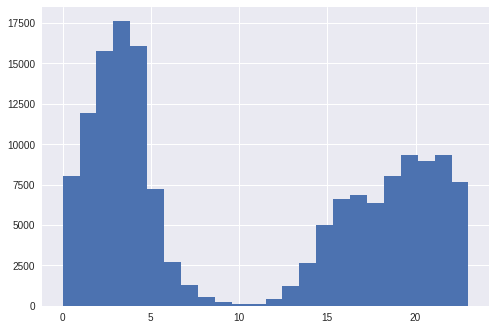

In [156]:
plt.hist([datetime.datetime.strptime(purchase.iloc[i].TIMESTAMP, '%Y-%m-%d %H:%M:%S').hour for i in range(len(purchase))],
        bins=24)
plt.show()

Plot the histogram of the views by hours..

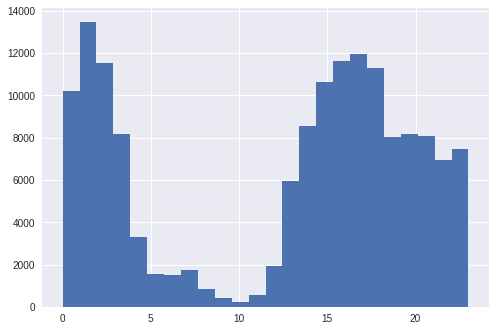

In [157]:
plt.hist([datetime.datetime.strptime(views.iloc[i].TIMESTAMP, '%Y-%m-%d %H:%M:%S').hour for i in range(len(purchase))],
        bins=24)
plt.show()

From these two pictures we see that the most intensive time for searching and buying is night. At 10 a.m. there is the least amount of activity. Also, it is shown that in the evening the customers are actively searching at 5 p.m. and buying at 8 p.m. So, from these facts it can be recommended to fit the sells to this data. For example, the company might make the sales during the least active period.

## Conversions for products

Calculate the conversion for each *product_id* from the purchase table. For that take the ratio of value counts from two tables. If there is no specific *product_id* in the views table put the zero as conversion (this will mean that the product was purchased without views, not very good convention).

In [171]:
purchase_products = purchase.PRODUCT_ID.value_counts()
views_products = views.PRODUCT_ID.value_counts()
conversions = defaultdict(float)

for product_id in tqdm_notebook(set(purchase.PRODUCT_ID.values)):
    try: conversions[product_id] = float(purchase_products[product_id]) / views_products[product_id]
    except KeyError: conversions[product_id] = 0

Plot the histogram of the conversions..

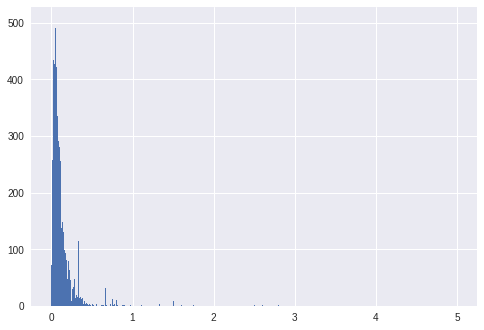

In [172]:
plt.hist(conversions.values(), bins=1000)
plt.show()

From the picture we see that the biggest part of the products has the convesions less than 0.3. Also, it is shown that there are some products with conversion more than 1. Besides, there are some products which was purchased without previous viewing.

In [180]:
print 'Number of products for which:'
print '\tconversion equal to 1: '+str(len([product_id for product_id in conversions.keys() if conversions[product_id]==1]))
print '\tconversion more than 1: '+str(len([product_id for product_id in conversions.keys() if conversions[product_id]>1]))
print '\twere purchased w/o views: '+str(len([product_id for product_id in conversions.keys() if conversions[product_id]==0]))

Number of products for which:
	conversion equal to 1: 59
	conversion more than 1: 81
	were purchased w/o views: 42


It will be better if the company will prioritize the products with conversions equal or more than 1. Also, the products which were shown were purchased without viewing should be actively recommended for customers.

## Products by sessions

Make the dictionary of all sessions for each product..

In [181]:
sessions_for_products = defaultdict(set)

for row in tqdm_notebook(purchase.iterrows()):
    sessions_for_products[row[1].PRODUCT_ID].add(row[1].SESSION_ID)

Calculate if the particullar whole set of sessions for the particullar product is repeated.

In [209]:
sessions_for_products_values = sessions_for_products.values()

repeated_sessions_for_products = [sessions_for_products_values[i] in sessions_for_products_values[:i] or 
                                  sessions_for_products_values[i] in sessions_for_products_values[i+1:]
                                  for i in range(len(sessions_for_products_values))]

In [212]:
repeated_sessions_for_products_values = [sessions_for_products_values[i] for i in range(len(sessions_for_products_values))
                                        if repeated_sessions_for_products[i]]

Find out which of the repeated sessions sets contains more than 3 different sessions. We got only one such sessions set.

In [219]:
print [i for i in repeated_sessions_for_products_values if len(i) > 3]

[set([2893708176404048896, 1688376693237596928, 1389112551005658624, 3835403333219092480]), set([2893708176404048896, 1688376693237596928, 1389112551005658624, 3835403333219092480])]


Let's see what are the products that was purchased during these sessions from the set.

In [221]:
[key for key in sessions_for_products.keys() 
 if sessions_for_products[key]==set([2893708176404048896, 1688376693237596928, 1389112551005658624, 3835403333219092480])]

[419568.0, 419566.0]

It means that the products with ids 419568.0 and 419566.0 all the time were purchased only together at 4 different sessions. Having more data it can possible to find out more such compatibilities and use them in order sell more efficiently.

## Activity during the month

Calculate the hour and the day for each entry in the tables..

In [225]:
purchase_hours = [datetime.datetime.strptime(purchase.iloc[i].TIMESTAMP, '%Y-%m-%d %H:%M:%S').hour 
                  for i in range(len(purchase))]
views_hours = [datetime.datetime.strptime(views.iloc[i].TIMESTAMP, '%Y-%m-%d %H:%M:%S').hour 
                  for i in range(len(views))]

purchase['HOUR'] = purchase_hours
views['HOUR'] = views_hours

In [ ]:
purchase_dates = [datetime.datetime.strptime(purchase.iloc[i].TIMESTAMP, '%Y-%m-%d %H:%M:%S').day
                  for i in range(len(purchase))]
views_dates = [datetime.datetime.strptime(views.iloc[i].TIMESTAMP, '%Y-%m-%d %H:%M:%S').day
                  for i in range(len(views))]

purchase['DATE'] = purchase_dates
views['DATE'] = views_dates

Plot the number of purchases and the number of views respectively by the days in the month. 

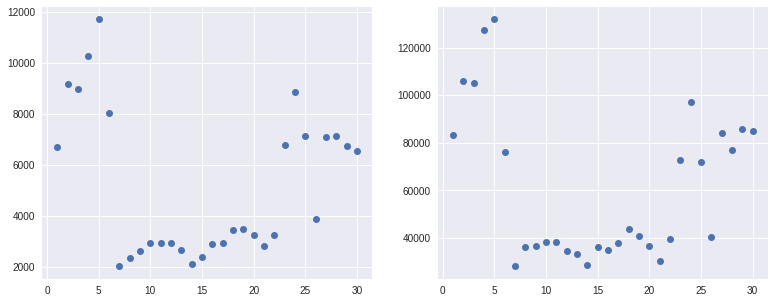

In [254]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(purchase.DATE.value_counts().keys(), purchase.DATE.value_counts().values, 'o')
plt.subplot(1,2,2)
plt.plot(views.DATE.value_counts().keys(), views.DATE.value_counts().values, 'o')
plt.show()

It is shown that the start and the end of the month are more intensive periods. It can be recommended to try to sell more actively during the stuck periods in the middle of the month.

## Brands' distribution

Plot the histogram of the brands in the views table..

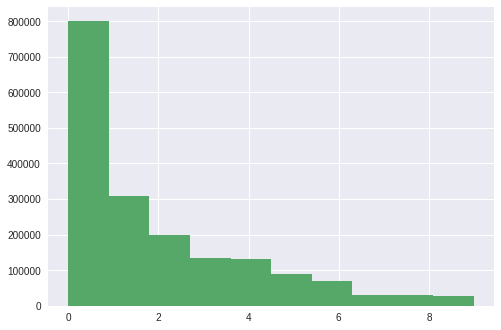

In [283]:
plt.hist(views.Brand)
plt.show()

Calculate the Brands values for each entry in the purchase table. If there is no particullar product in the views table put None as the Brand.

In [300]:
purchase_brands = []
for product_id in tqdm_notebook(purchase.PRODUCT_ID):
    try: purchase_brands.append(views[views.PRODUCT_ID==product_id].Brand.values[0])
    except IndexError: purchase_brands.append(None)

Plot the histogram of the Brands values for the views table..

In [305]:
for i in range(len(purchase_brands)):
    if purchase_brands[i]==None: purchase_brands[i] = 10

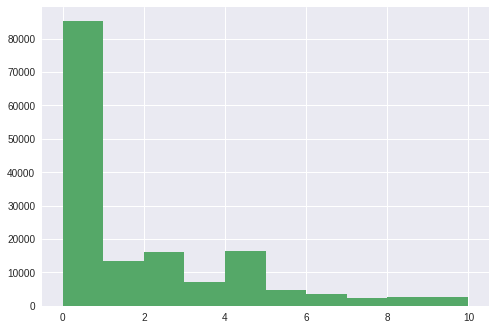

In [306]:
plt.hist(purchase_brands)
plt.show()

From the pictures we can see that Brand 0 is the most popular brand for the purchase and for the views. However, for other brands the distrubutions are different in two tables. This is important to notice that the Brands 2 and 4 are better for selling. So, the company should make their emphasis on the Brands 0, 2 and 4 while planning for their future months.

## Prices' distribution

Plot the histogram of prices in the purchase table..

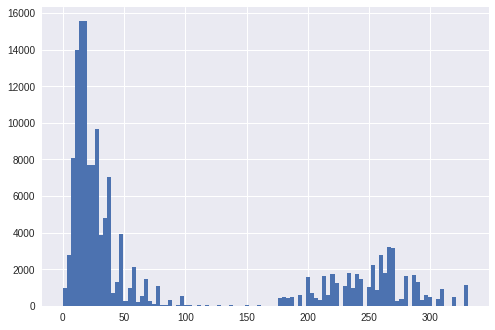

In [310]:
plt.hist(purchase.BASE_PRICE, bins=100)
plt.show()

Calculate prices for each entry in the views table.. If it is impossible to find price of the particullar product because of its absence in the purchase table put the zero as the price.

In [307]:
views_prices = []
for product_id in tqdm_notebook(views.PRODUCT_ID):
    try: views_prices.append(purchase[purchase.PRODUCT_ID==product_id].BASE_PRICE.values[0])
    except IndexError: views_prices.append(0)

Plot the histogram of the prices in the views table..

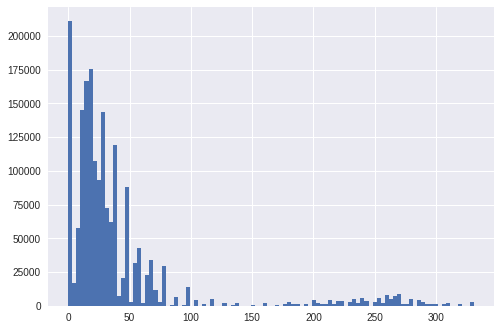

In [309]:
plt.hist(views_prices, bins=100)
plt.show()

From the histograms it is possible to notice that the customers are more likely to purchase the products with small prices. The products with the highest prices are also a little interesting for people. However, the number of the average-price products is the least. This is also should be beared in mind for sales planning.

Having more data it is possible to find out more facts about products and use them in the future. For example, getting the timestamps of the end of the sessions we can calculate the distributions of time spendings for the successfull sessions and the opposite ones and modify the company's website according to this data in order to keep the user the required time.